# Introducción

El objetivo de esta práctica es mostrar al alumno las posibilidades que ofrece R para analizar datos de distintas fuentes diferentes, extraer datos, comparar, hacer gráficas y sacar estadísticos.

Las fuentes de datos que se tienen son:
* Datos meteorológicos de Praga de 1775 hasta 2004: https://www.ncdc.noaa.gov/cdo-web/datasets
* Banco mundial: https://data.worldbank.org/topic/climate-change
* Nivel de CO2 en la atmósfera (Mauna Loa): https://www.esrl.noaa.gov/gmd/ccgg/trends/data.html

Todos los ficheros necesarios para resolver la práctica se ofrecen como adjuntos.

In [2]:
# Instalación y carga de librerías extras

#dir.create(file.path("~/R/x86_64-pc-linux-gnu-library/3.2"), recursive = T)
#install.packages(c("dplyr", "ggpubr", "gridExtra", "cowplot"), lib = "~/R/x86_64-pc-linux-gnu-library/3.2", repos = 'https://cran.rstudio.com/', verbose = F)

library("ggplot2")
library("reshape2")
library("dplyr", lib.loc = "~/R/x86_64-pc-linux-gnu-library/3.2")
library("ggpubr", lib.loc = "~/R/x86_64-pc-linux-gnu-library/3.2")
library("gridExtra", lib.loc = "~/R/x86_64-pc-linux-gnu-library/3.2")
library("cowplot", lib.loc = "~/R/x86_64-pc-linux-gnu-library/3.2")

## Datos meteorológicos NOAA

Carga el tiempo meteorológico de Praga en un data.frame. Fichero: *EZE00100082*

In [3]:
weatherPraga<-read.csv("./datos/EZE00100082.csv", sep = ",")

Mostrar los 10 años que más precipitiaciones han tenido junto con su valor correspondiente (columna PRCP):

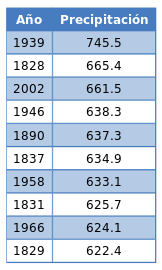

In [5]:
options(repr.plot.height = 2.25, repr.plot.width = 1.35)

# Seleccionamos las columnas DATE y PRCP, nos quedamos con el top 10 y lo ordenamos por la columna PRCP
weatherPraga %>%
    select(DATE, PRCP) %>%
    top_n(n = 10, wt = PRCP) %>%
    arrange(desc(PRCP)) %>%
    ggtexttable(rows = NULL, cols = c("Año", "Precipitación"),
                theme = ttheme("mBlueWhite", base_size = 7, padding = unit(c(3, 3), "mm")))

options(repr.plot.height = 7, repr.plot.width = 7)

* Muestra en un diagrama de dispersión la temperatura mínima registrada en un año (columna EMNT) en función del año registrado (columna DATE).
* Crear una regresión lineal (polinomio orden 1) que muestre la tendencia. Pintarla sobre el diagrama de dispersión.
* En media, ¿Cuantos grados ha aumentado la temperatura mínima cada año? (pendiente de la  regresión lineal)

[1] "La temperatura mínima ha aumentado 0.01738 grados cada año."

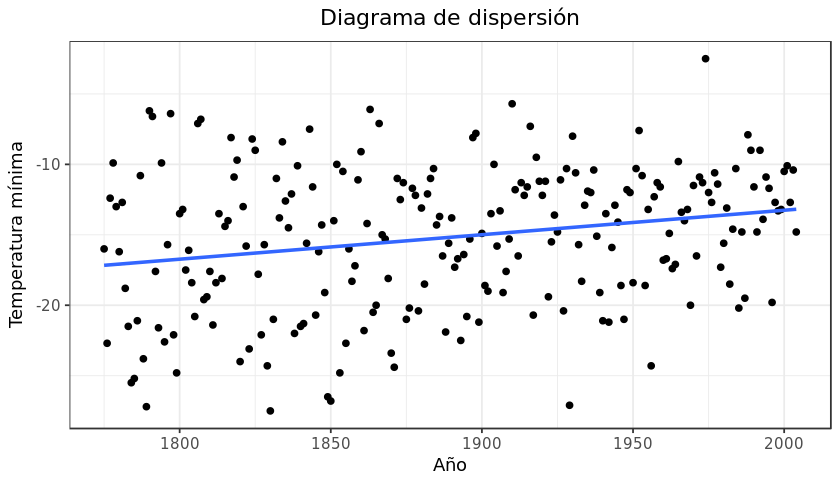

In [6]:
options(repr.plot.height = 4, repr.plot.width = 7)

# Dibujamos un diagrama de dispersión de las columnas DATE y EMNT con su regresión lineal
ggplot(data = weatherPraga, aes(x = DATE, y = EMNT)) +
    geom_point(color = "black") +
    geom_smooth(method=  "lm", formula = y ~ x, se = FALSE) +
    labs(title = "Diagrama de dispersión", x = "Año", y = "Temperatura mínima") +
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5))

options(repr.plot.height = 7, repr.plot.width = 7)

# Obtenemos la pendiente de la regresión lineal
paste("La temperatura mínima ha aumentado",
      round(summary(lm(data = weatherPraga, formula = EMNT ~ DATE))$coefficients[2], 5),
      "grados cada año.")

¿Ha subido realmente la temperatura mínima?
* Calcula la media de la temperatura mínima (columna EMNT) del intervalo de años [1775,1794]
* Calcula la media de la temperatura mínima (columna EMNT) del intervalo de años [1985,2004]
* ¿Cual es la diferencia entre ambos? ¿Es estadísticamente significativa?
  * Nota: antes de aplicar un test estadístico hay que ver si cumple con los requisitos de ese test.

In [7]:
# Filtramos el intervalo de años y seleccionamos las columnas DATE y EMNT para después hacer la media de EMNT
mean.1775_1794 <- weatherPraga %>% filter(DATE >= 1775 & DATE <= 1794) %>% select(DATE, EMNT)
paste("La media de la temperatura mínima entre los años 1775 y 1794 es:", mean(mean.1775_1794$EMNT))

# Filtramos el intervalo de años y seleccionamos las columnas DATE y EMNT para después hacer la media de EMNT
mean.1985_2004 <- weatherPraga %>% filter(DATE >= 1985 & DATE <= 2004) %>% select(DATE, EMNT)
paste("La media de la temperatura mínima entre los años 1985 y 2004 es:", mean(mean.1985_2004$EMNT))

# Comprobamos que sean una distribución normal y ambas tengan la misma varianza
paste("Los datos de temperatura mínima entre los años 1775 y 1794 se parecen a una gaussiana. p-valor:",
      shapiro.test(mean.1775_1794$EMNT)$p.value)
paste("Los datos de temperatura mínima entre los años 1985 y 2004 se parecen a una gaussiana. p-valor:",
      shapiro.test(mean.1985_2004$EMNT)$p.value)
paste("La varianza de los grupos no se puede considerar la misma. p-valor:",
      var.test(mean.1775_1794$EMNT, mean.1985_2004$EMNT)$p.value)

paste("T-test de Welch unilateral (izquierda). p-valor:",
      t.test(mean.1775_1794$EMNT, mean.1985_2004$EMNT, var.equal = FALSE, alternative = "less")$p.value,
      "Por lo que podemos afirmar que la media entre los años 1775 y 1794",
      "es estadísticamente significativa menor a la media entre los años 1985 y 2004.")

[1] "La media de la temperatura mínima entre los años 1775 y 1794 es: -16.935"

[1] "La media de la temperatura mínima entre los años 1985 y 2004 es: -13.04"

[1] "Los datos de temperatura mínima entre los años 1775 y 1794 se parecen a una gaussiana. p-valor: 0.380826132704572"

[1] "Los datos de temperatura mínima entre los años 1985 y 2004 se parecen a una gaussiana. p-valor: 0.0751036246207044"

[1] "La varianza de los grupos no se puede considerar la misma. p-valor: 0.0109964008935728"

[1] "T-test de Welch unilateral (izquierda). p-valor: 0.0128534214500864 Por lo que podemos afirmar que la media entre los años 1775 y 1794 es estadísticamente significativa menor a la media entre los años 1985 y 2004."

## Datos banco mundial

Carga los datos del banco mundial

In [8]:
databank<-read.csv("./datos/API_19_DS2_en_csv_v2.csv",skip=4)
#Borramos las X del nombre de la columna
colnames(databank)<-gsub("X","",colnames(databank))

countryData<-read.csv("./datos/Metadata_Country_API_19_DS2_en_csv_v2.csv")

# De esta forma podremos aceder a la información de paises usando su countryCode
rownames(countryData)<-countryData$Country.Code

realCountryData<-subset(countryData,IncomeGroup!="")
regionData<-subset(countryData,IncomeGroup=="")
print(paste("Tenemos un total de",nrow(realCountryData),"paises"))
print(paste("Tenemos un total de",nrow(regionData),"regiones"))
indicators<-read.csv("./datos/Metadata_Indicator_API_19_DS2_en_csv_v2.csv")
print(paste("Tenemos un total de",nrow(indicators),"indicadores"))

[1] "Tenemos un total de 217 paises"
[1] "Tenemos un total de 46 regiones"
[1] "Tenemos un total de 80 indicadores"


¿Cual fue el país que más toneladas de CO2 equivalente emitió en 1970 (Mostrar *Country.Name*)?
¿Cuanto contaminó?

Hay una dataframe con la lista de pasises en *realCountryData*
El número de toneladas de CO2 equivalente viene dado por el Indicator.Code *"EN.ATM.GHGT.KT.CE"*


In [9]:
# Recreamos el data frame de databank para convertir los nombres de columnas numéricos
databank <- data.frame(databank, stringsAsFactors = F)
# Seleccionamos las columnas Country.Name y 1970, nos quedamos con el top 1
# y filtramos por la lista de países y por el indicador de CO2
country <- databank %>%
    filter(Country.Code %in% realCountryData$Country.Code) %>%
    filter(Indicator.Code == "EN.ATM.GHGT.KT.CE") %>%
    select(Country.Name, X1970) %>%
    top_n(1, X1970)

paste("El país que más contaminó fue", country$Country.Name, "con", country$X1970 * 1000, "toneladas de CO2.")

[1] "El país que más contaminó fue United States con 5400503500 toneladas de CO2."

¿Cuales fueron los 5 países que más toneladas de CO2 equivalente emitieron en 2012? ¿Cuantas kt emitieron?

In [10]:
# Seleccionamos las columnas Country.Name y 2012, nos quedamos con el top 5
# y filtramos por la lista de países y por el indicador de CO2
countries <- databank %>%
    filter(Country.Code %in% realCountryData$Country.Code) %>%
    filter(Indicator.Code == "EN.ATM.GHGT.KT.CE") %>%
    select(Country.Name, X2012) %>%
    top_n(5, X2012) %>%
    arrange(desc(X2012))

paste("Los 5 países que más toneladas de CO2 fueron:",
      paste(countries$Country.Name, collapse = ", "))
paste("Emitieron ", round(sum(countries$X2012), 2), "kt de CO2.")

[1] "Los 5 países que más toneladas de CO2 fueron: China, United States, India, Brazil, Russian Federation"

[1] "Emitieron  27594262.48 kt de CO2."

¿Cual ha sido la media del **porcentaje** de crecimiento de las emisiones de CO2 equivalente en China desde 2000 hasta 2012?

In [11]:
# Seleccionamos las columnas entre 2000:2012 y filtramos por país y por el indicador de CO2
china <- databank %>%
    filter(Country.Code == "CHN") %>%
    filter(Indicator.Code == "EN.ATM.GHGT.KT.CE") %>%
    select(num_range(prefix = "X", range = 2000:2012))

# Reorganizamos el data frame obtenido para facilitar el cálculo del porcentaje
china.ratio <- melt(china)
china.ratio$Ratio <- NA
colnames(china.ratio) <- c("Año", "CO2", "Ratio")
china.ratio$Ratio <- c(NA, china.ratio$CO2[2:length(china.ratio$CO2)] / china.ratio$CO2[1:length(china.ratio$CO2) - 1])

myGeometricMean <- function(X, na.rm = F) {
    if (na.rm){
        X <- na.omit(X)
    }
    m <- 1
    for (xi in X){
        m <- m * xi        
    }
    m ^ (1 / length(X))
}

# Calculamos la media geómetrica de los diferentes porcentajes
paste("La media de porcentaje de crecimiento de las emisiones ha sido:",
      round((myGeometricMean(china.ratio$Ratio, na.rm = T) - 1) * 100, 2), "%")

No id variables; using all as measure variables


[1] "La media de porcentaje de crecimiento de las emisiones ha sido: 7.76 %"

Compara las emisiones de CO2(kt) per cápita (clave en Indicator.Code: *EN.ATM.CO2E.PC*) de todos los paises en 1960,1990 y 2014 mediante:
* diagrama de cajas
* histograma
* curvas de densidad

In [12]:
# Seleccionamos las columnas Country.Name, 1960, 1990 y 2014
# y filtramos por la lista de países y por el indicador de CO2 per cápita
co2.1960_1990_2014 <- melt(databank %>%
    filter(Country.Code %in% realCountryData$Country.Code) %>%
    filter(Indicator.Code == "EN.ATM.CO2E.PC") %>%
    select(Country.Name, X1960, X1990, X2014), id = c("Country.Name"), na.rm = TRUE)

# Reorganizamos el data frame obtenido para facilitar los gráficos
colnames(co2.1960_1990_2014) <- c("Country", "Year", "CO2")
co2.1960_1990_2014$Year <- factor(co2.1960_1990_2014$Year, labels = c("1960", "1990", "2014"))

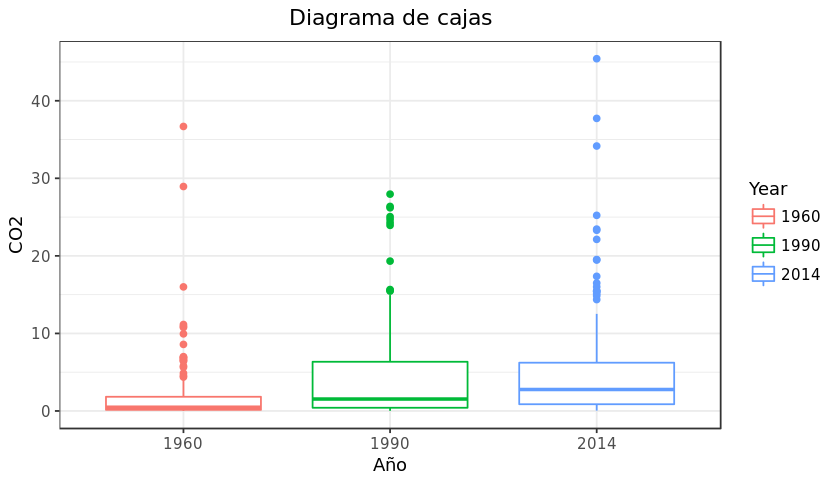

In [13]:
options(repr.plot.height = 4, repr.plot.width = 7)

# Diagrama de cajas
ggplot(data = co2.1960_1990_2014, aes(x = Year, y = CO2, color = Year)) +
    geom_boxplot() +
    labs(title = "Diagrama de cajas", x = "Año", y = "CO2") +
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5))

options(repr.plot.height = 7, repr.plot.width = 7)


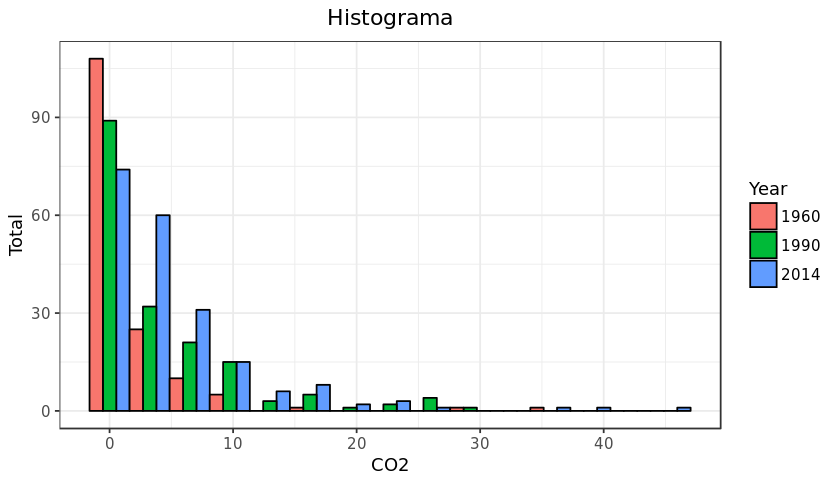

In [14]:
options(repr.plot.height = 4, repr.plot.width = 7)

# Histograma
ggplot(data = co2.1960_1990_2014, aes(x = CO2, fill = Year)) +
    geom_histogram(color = "black", bins = 15, position = "dodge") +
    labs(title = "Histograma", x = "CO2", y = "Total") +
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5))

options(repr.plot.height = 7, repr.plot.width = 7)

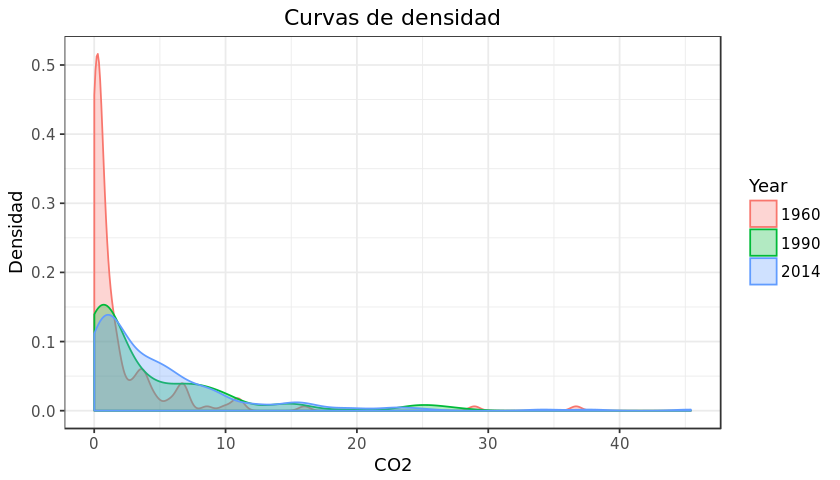

In [15]:
options(repr.plot.height = 4, repr.plot.width = 7)

# Curvas de densidad
ggplot(data = co2.1960_1990_2014, aes(x = CO2)) +
    geom_density(aes(group = Year, colour = Year, fill = Year), alpha = 0.3) +
    labs(title = "Curvas de densidad", x = "CO2", y = "Densidad") +
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5))

options(repr.plot.height = 7, repr.plot.width = 7)

Utilizando ggplot: Compara en una gráfica las emisiones totales de CO2(kt) en función del año de las siguientes regiones:
* Mundo entero: WLD
* Unión europea: EUU
* Africa subsahariana: SSA
* Norteamérica: NAC
* Este de Asia y pacífico: TEA

Ayuda: Tendrás que usar la función *melt()* para transformar los años, cada año en una columna, en un data.frame donde cada uno esté en una fila.

Suponiendo que la tendencia se mantiene, es decir, que no se aplica ninguna política a nivel global de reducción de emisiones de CO2, ¿cual sería el total de emisiones de CO2 en todo el mundo en el año 2020?

Para calcularlo utiliza tres modelos lineales:
* Regresión lineal con polinomio grado 1
* Regresión lineal polinomio grado 3
* Regresión lineal polinomio grado 10

Represénta en una gráfica el valor real y el calculado por cada uno de los 3 modelos.

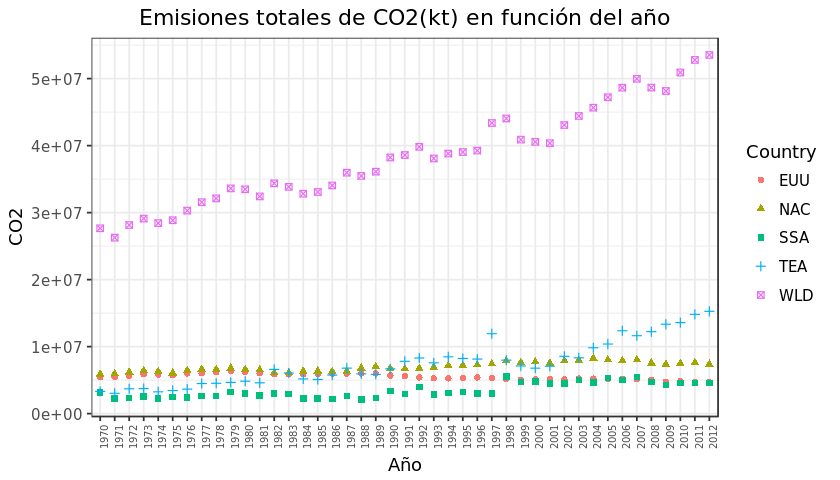

In [16]:
# Seleccionamos las columnas Country.Code y todos los años
# y filtramos por la lista de regiones y por el indicador de CO2
total <- databank %>%
    filter(Country.Code %in% c("WLD", "EUU", "SSA", "NAC", "TEA")) %>%
    filter(Indicator.Code == "EN.ATM.GHGT.KT.CE") %>%
    select(Country.Code, num_range(prefix = "X", range = 1960:2017))

# Reorganizamos el data frame obtenido para facilitar los gráficos
total <- melt(total, id = c("Country.Code"), na.rm = TRUE)
colnames(total) <- c("Country", "Year", "CO2")
total$Year <- factor(total$Year, labels = c(1970:2012))

options(repr.plot.height = 4, repr.plot.width = 7)

# Dibujamos un diagrama de dispersión de las columnas Year y CO2 separado por Country
ggplot(data = total, aes(x = Year, y = CO2, color = Country, shape = Country)) +
    geom_point() +
    labs(title = "Emisiones totales de CO2(kt) en función del año", x = "Año", y = "CO2") +
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle = 90, size = 6))

options(repr.plot.height = 7, repr.plot.width = 7)

Warning message:
“Removed 9 rows containing missing values (geom_point).”

[1] "La predicción según la regresión lineal con polinomio de grado 1 es de 55152033.55 kt de emisiones de CO2 en todo el mundo en el año 2020."

[1] "La predicción según la regresión lineal con polinomio de grado 3 es de 65067658.63 kt de emisiones de CO2 en todo el mundo en el año 2020."

[1] "La predicción según la regresión lineal con polinomio de grado 10 es de 462426958.41 kt de emisiones de CO2 en todo el mundo en el año 2020."

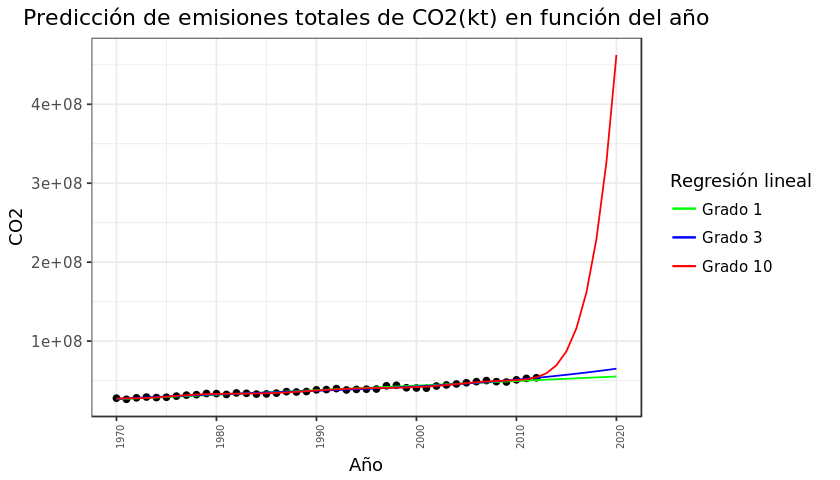

In [17]:
# Seleccionamos las columnas Year y CO2 y filtramos por la región WLD
totalWLD <- total %>%
    filter(Country == "WLD") %>%
    select(Year, CO2) %>%
    mutate_at(.vars = "Year", .funs = funs(as.numeric(levels(.))[.]))

# Calculamos las regresiones lineales
poly1 <- lm(formula = CO2 ~ Year, data = totalWLD)
poly3 <- lm(formula = CO2 ~ Year + I(Year^2) + I(Year^3), data = totalWLD)
poly10 <- lm(formula = CO2 ~ poly(Year, 10), data = totalWLD)

# Calculamos las predicciones
totalWLD$predicted1 <- predict(poly1, totalWLD)
totalWLD$predicted3 <- predict(poly3, totalWLD)
totalWLD$predicted10 <- predict(poly10, totalWLD)

# Calculamos las predicciones para los años 2012:2020
newYear <- data.frame("Year" = c(2012:2020))
totalWLD <- totalWLD %>%
    add_row(Year = c(2012:2020),
            predicted1 = predict(poly1, newYear),
            predicted3 = predict(poly3, newYear),
            predicted10 = predict(poly10, newYear))

options(repr.plot.height = 4, repr.plot.width = 7)

# Dibujamos un diagrama de dispersión, con las regresiones lineales y las predicciones
ggplot(data = totalWLD) +
    geom_point(aes(x = Year, y = CO2)) +
    geom_line(aes(x = Year, y = predicted1, colour = "p01")) +
    geom_line(aes(x = Year, y = predicted3, colour = "p03")) +
    geom_line(aes(x = Year, y = predicted10, colour = "p10")) +
    labs(title = "Predicción de emisiones totales de CO2(kt) en función del año", x = "Año", y = "CO2") +
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle = 90, size = 6)) +
    scale_colour_manual(values = c(p01 = "green", p03 = "blue", p10 = "red"),
                        name = "Regresión lineal",
                        labels = c("Grado 1", "Grado 3", "Grado 10"))

options(repr.plot.height = 7, repr.plot.width = 7)

paste("La predicción según la regresión lineal con polinomio de grado 1 es de",
      round(last(totalWLD$predicted1), 2),
      "kt de emisiones de CO2 en todo el mundo en el año 2020.")
paste("La predicción según la regresión lineal con polinomio de grado 3 es de",
      round(last(totalWLD$predicted3), 2),
      "kt de emisiones de CO2 en todo el mundo en el año 2020.")
paste("La predicción según la regresión lineal con polinomio de grado 10 es de",
      round(last(totalWLD$predicted10), 2),
      "kt de emisiones de CO2 en todo el mundo en el año 2020.")

## Nivel de CO2

En esta parte vamos a trabajar con el nivel medio de CO2 medido por el NOAA en Manuna Loa (Hawai) desde 1968.

In [18]:
co2ppm<-read.csv("./datos/co2_mm_mlo.txt",skip=73,sep="",header = F, 
                 col.names= c("year","month","date","average","interpolated","trend","days"))

Representa el diagrama de dispersión entre:
* CO2 medido en la atmósfera (co2ppm\$interpolated)
* CO2 emitido por todos los países (databank con Indicator.Code=="EN.ATM.CO2E.KT" y Country.Code=="WLD"?

¿Cual es su correlación?


Nota: 

* Los valores en co2ppm vienen en meses, habrá que agregarlos, calcular la media anual a partir de los meses para así poder hacer la correlación con databank.
* Los valores en databank vienen en columnas, habrá que pasarlos a filas utilizando la función *melt*.

No id variables; using all as measure variables


[1] "La correlación entre interpolated y CO2 es de 0.98"

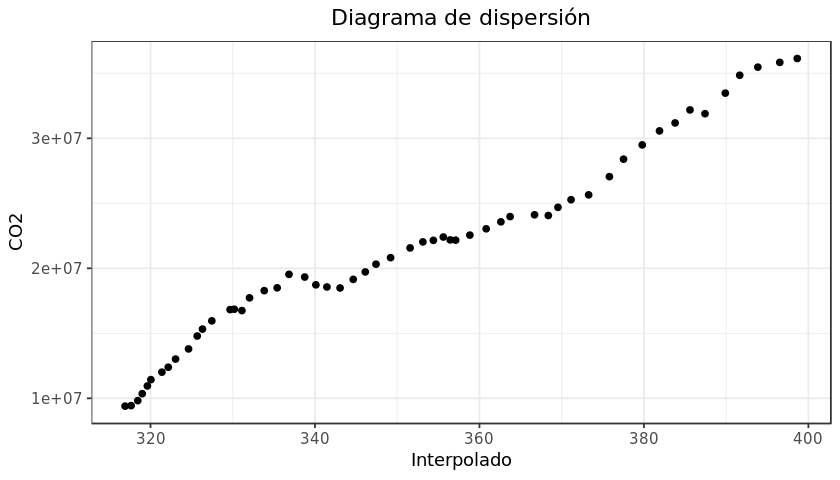

In [19]:
# Seleccionamos las columnas de años y filtramos por la región WLD y por el indicador
co2.world <- databank %>%
    filter(Country.Code == "WLD") %>%
    filter(Indicator.Code == "EN.ATM.CO2E.KT") %>%
    select(num_range(prefix = "X", range = 1960:2017))

# Reorganizamos el data frame obtenido
co2.world  <- melt(co2.world, na.rm = TRUE)
colnames(co2.world ) <- c("year", "CO2")
co2.world$year <- c(1960:2014)

# Agrupamos los datos por año y calculamos la media anual
co2ppm.world <- co2ppm %>%
    group_by(year) %>%
    summarize(interpolated = mean(interpolated))

co2.join <- inner_join(co2.world, co2ppm.world, by = "year")

options(repr.plot.height = 4, repr.plot.width = 7)

# Dibujamos un diagrama de dispersión de las columnas interpolated y CO2
ggplot(data = co2.join, aes(x = interpolated, y = CO2)) +
    geom_point(color = "black") +
    labs(title = "Diagrama de dispersión", x = "Interpolado", y = "CO2") +
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5))

options(repr.plot.height = 7, repr.plot.width = 7)

paste("La correlación entre interpolated y CO2 es de",
      round(cor(co2.join$interpolated, co2.join$CO2), 2))

Calcular la matriz de correlación de las siguientes variables:
* Cantidad de CO2 en la atmósfera
* Emisiones totales CO2 en la atmósfera
* Temperatura mínima en Praga (columna EMNT).

In [20]:
# Matriz de correlación
cor(inner_join(co2.join, weatherPraga %>% select(DATE, EMNT), by = c("year" = "DATE"))[2:4], use = "complete.obs")

,CO2,interpolated,EMNT
CO2,1.0000000,0.9703198,0.2254552
interpolated,0.9703198,1.0000000,0.1783153
EMNT,0.2254552,0.1783153,1.0000000
